In [9]:
from Crypto.Util.number import inverse
def isqrt(n):
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

# Prerequisites

- DLP
- Groups

# Theory

- Explanation: https://www.youtube.com/watch?v=007MVsELvQw

BSGS is a collision allgorithm
let $g$ = a generator element of a group $G$
$N$ = order of elem $g$

(1) $\operatorname{Let} n=1+\lfloor\sqrt{N}\rfloor,$ so in particular, $n>\sqrt{N}$  
(2) Create two lists: 

\begin{array}{ll}
\text { List } 1: & e, g, g^{2}, g^{3}, \ldots, g^{n} \\
\text { List } 2: & h, h \cdot g^{-n}, h \cdot g^{-2 n}, h \cdot g^{-3 n}, \ldots, h \cdot g^{-n^{2}}
\end{array}

(3) Find a match between the two lists, say $g^{i}=h g^{-j n}$  
(4) Then $x=i+j n$ is a solution to $g^{x}=h$



# Code

In [4]:
def order_of_elem(g, p):
    N = 1
    temp = 1
    while True:
        temp = (temp * g) % p
        #print(temp)
        if(temp == 1):
            break
        N+=1
    return N

Wikipedia:
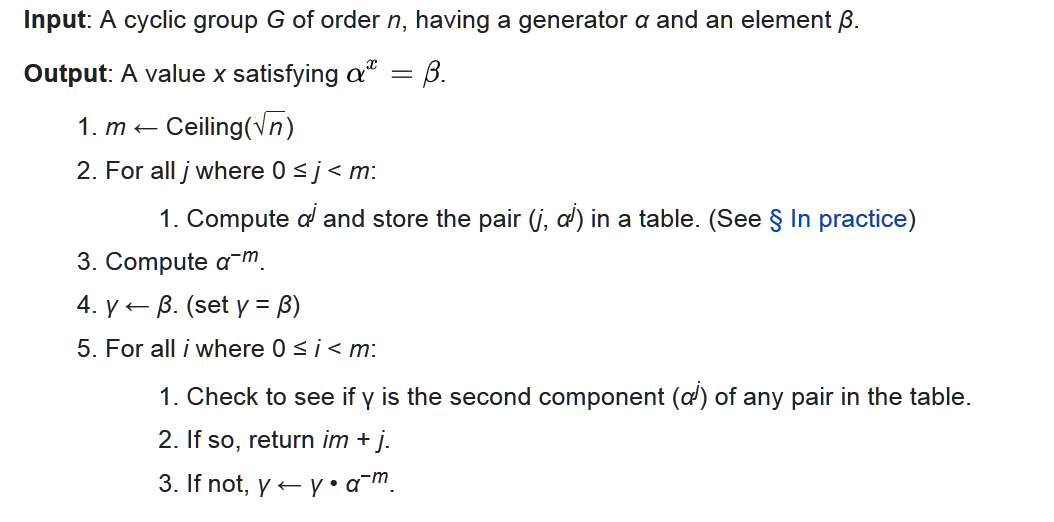

for the algorithm below
- $\alpha = g$ = the generator
- $ \beta = h$
- $ m = n$ = the bound
- $ n = N$ = the order of $g$

In [6]:
p = 17389
g = 2 #generator
h = 13896 #g^x = h
N = order_of_elem(g, p)

In [16]:
def bsgs(g, h, p):
    #calculate order of g

    N = order_of_elem(g, p)
    n = isqrt(N) + 1
    
    #create the collision lists
    lookup_table = {pow(g, j, p):j for j in range(n + 1)}
    
    c = inverse(pow(g, n, p), p)
    temp = h
    for i in range(n+1):
        temp = h*pow(c, i, p) % p
        if temp in lookup_table:
            return i*n + lookup_table[temp]
    return -1

In [17]:
bsgs(g, h, p)

6874

# Resources

- https://en.wikipedia.org/wiki/Baby-step_giant-step
- https://en.wikipedia.org/wiki/Meet-in-the-middle_attack
